<a href="https://colab.research.google.com/github/ArtemBritskiy/user-system/blob/main/Intrusion_detection_program_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRUSION-DETECTION-USING-MACHINE-LEARNING**

Система обнаружения вторжений (Intrusion Detection System, IDS) используется для отслеживания вредоносных действий в сети. Она может сортировать незнакомые записи как обычные или атакующие. Сначала проводится мониторинг, а затем сетевой трафик сортируется на вредоносный или обычный. Она действует как система сигнализации, которая сообщает об обнаружении незаконной деятельности. Точность IDS зависит от скорости обнаружения. Если производительность IDS высока, то и корректность обнаружения также высока. Некоторые системы обнаружения вторжений предлагаются на рынке с возможностью останавливать атаки до того, как они станут успешными. Системы обнаружения вторжений существуют уже давно. Они используются для защиты организации от атак. Это относительная концепция, которая пытается идентифицировать хакера при попытке проникновения. В идеале такая система подает сигнал тревоги только в случае успешной атаки. Система обнаружения вторжений не является идеальным решением для всех типов атак. Хорошая программа безопасности или средства защиты не могут быть заменены IDS. Настоящие пользователи, которые могут попытаться получить доступ к информации для своего удовольствия, не могут быть идентифицированы с помощью IDS. Цели IDS определяют требования к политике IDS.

# **Beginning code for an intrusion detection program using machine learning**

In [3]:
#importing libraries
import numpy as np
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving train_kddcup.csv to train_kddcup.csv


In [7]:
kdd_train = pd.read_csv("train_kddcup.csv")

In [24]:
# watching the head of the data set
kdd_train.head()
kdd_train.shape

(125972, 43)

# **Data prepocessing**




In [10]:
kdd_train.columns = ['train_duration', 'train_protocol_type', 'train_service', 'train_flag', 'src_bytes',
                     'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
                     'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
                     'num_shells', 'num_access_files', 'dummy', 'num_outbound_cmds', 'is_host_login',
                     'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
                     'srv_rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                     'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                     'dst_host_srv_serror_rate', 'train_dst_host_rerror_rate', 'dst_bushost_srv_rerror_rate']

In [11]:
kdd_train.head()

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [12]:
# Dropping Unessasry coloumns
kdd_train_clean = kdd_train.drop(
    ['wrong_fragment', 'urgent', 'num_failed_logins', 'num_file_creations', 'num_shells', 'dummy',
     'num_outbound_cmds'], axis=1)

In [13]:
kdd_train_clean.head()

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [15]:
# Checking the datatypes of the coloumns
kdd_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   train_duration               125972 non-null  int64  
 1   train_protocol_type          125972 non-null  object 
 2   train_service                125972 non-null  object 
 3   train_flag                   125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   hot                          125972 non-null  int64  
 8   logged_in                    125972 non-null  int64  
 9   num_compromised              125972 non-null  int64  
 10  root_shell                   125972 non-null  int64  
 11  su_attempted                 125972 non-null  int64  
 12  num_root                     125972 non-null  int64  
 13 

In [16]:
# Basic Statistics of coloumns
kdd_train_clean.describe()

,train_duration,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_bushost_srv_rerror_rate
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.204411,0.395739,0.279253,0.001342,0.001103,0.302194,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,2.149977,0.489011,23.942137,0.036603,0.045155,24.399715,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,77.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [17]:
# counting the categories of coloumns
kdd_train_clean['train_protocol_type'].value_counts()

tcp     102688
udp      14993
icmp      8291
Name: train_protocol_type, dtype: int64

In [18]:
kdd_train_clean['train_service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: train_service, Length: 70, dtype: int64

In [19]:
kdd_train_clean['train_flag'].value_counts()

SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: train_flag, dtype: int64

In [20]:
kdd_train_clean['train_dst_host_rerror_rate'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: train_dst_host_rerror_rate, dtype: int64

In [21]:
# Data Transormation
train_protocol_type = {'tcp': 0, 'udp': 1, 'icmp': 2}
train_protocol_type.items()
kdd_train_clean.train_protocol_type = [train_protocol_type[item] for item in kdd_train_clean.train_protocol_type]
kdd_train_clean.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,1,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,0,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,0,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,0,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,0,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,0,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,0,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,0,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,0,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,0,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


In [ ]:
# Checking the condition and data transformation
train_duration = kdd_train_clean['train_duration']
for i in train_duration:
    if i <= 2:
        print('good condition', i)
    else:
        print('bad condition', i)

In [25]:
kdd_train_clean['train_duration'] = np.where((kdd_train_clean.train_duration <= 2), 0, 1)

In [26]:
kdd_train_clean.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,1,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,0,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,0,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,0,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,0,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,0,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,0,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,0,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,0,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,0,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


In [27]:
train_replace_map = {'normal': "normal", 'DOS': ['back', 'land', 'pod', 'neptune', 'smurf', 'teardrop'],
                     'R2L': ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'spy', 'phf', 'warezclient',
                             'warezmaster'], 'U2R': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit'],
                     'PROBE': ['ipsweep', 'nmap', 'portsweep', 'satan']}

In [28]:
kdd_train_format = kdd_train_clean.assign(
    train_dst_host_rerror_rate=kdd_train_clean['train_dst_host_rerror_rate'].apply(
        lambda x: [key for key, value in train_replace_map.items() if x in value][0]))

In [29]:
kdd_train_format.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,1,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,0,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,19
2,0,0,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,0,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,0,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
5,0,0,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
6,0,0,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
7,0,0,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
8,0,0,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
9,0,0,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21


In [30]:
train_service = {'aol': 1, 'auth': 2, 'bgp': 3, 'courier': 4, 'csnet_ns': 5, 'ctf': 6, 'daytime': 7, 'discard': 8,
                 'domain': 9, 'domain_u': 10, 'echo': 11, 'eco_i': 12, 'ecr_i': 13, 'efs': 14, 'exec': 15,
                 'finger': 16, 'ftp': 17, 'ftp_data': 18, 'gopher': 19, 'harvest': 20, 'hostnames': 21, 'http': 22,
                 'http_2784': 23, 'http_443': 24, 'http_8001': 25, 'imap4': 26, 'IRC': 27, 'iso_tsap': 28,
                 'klogin': 29, 'kshell': 30, 'ldap': 31, 'link': 32, 'login': 33, 'mtp': 34, 'name': 35,
                 'netbios_dgm': 36, 'netbios_ns': 37, 'netbios_ssn': 38, 'netstat': 39, 'nnsp': 40, 'nntp': 41,
                 'ntp_u': 42, 'other': 43, 'pm_dump': 44, 'pop_2': 45, 'pop_3': 46, 'printer': 47, 'private': 48,
                 'red_i': 49, 'remote_job': 50, 'rje': 51, 'shell': 52, 'smtp': 53, 'sql_net': 54, 'ssh': 55,
                 'sunrpc': 56, 'supdup': 57, 'systat': 58, 'telnet': 59, 'tftp_u': 60, 'tim_i': 61, 'time': 62,
                 'urh_i': 63, 'urp_i': 64, 'uucp': 65, 'uucp_path': 66, 'vmnet': 67, 'whois': 68, 'X11': 69,
                 'Z39_50': 70}

In [31]:
train_service.items()

dict_items([('aol', 1), ('auth', 2), ('bgp', 3), ('courier', 4), ('csnet_ns', 5), ('ctf', 6), ('daytime', 7), ('discard', 8), ('domain', 9), ('domain_u', 10), ('echo', 11), ('eco_i', 12), ('ecr_i', 13), ('efs', 14), ('exec', 15), ('finger', 16), ('ftp', 17), ('ftp_data', 18), ('gopher', 19), ('harvest', 20), ('hostnames', 21), ('http', 22), ('http_2784', 23), ('http_443', 24), ('http_8001', 25), ('imap4', 26), ('IRC', 27), ('iso_tsap', 28), ('klogin', 29), ('kshell', 30), ('ldap', 31), ('link', 32), ('login', 33), ('mtp', 34), ('name', 35), ('netbios_dgm', 36), ('netbios_ns', 37), ('netbios_ssn', 38), ('netstat', 39), ('nnsp', 40), ('nntp', 41), ('ntp_u', 42), ('other', 43), ('pm_dump', 44), ('pop_2', 45), ('pop_3', 46), ('printer', 47), ('private', 48), ('red_i', 49), ('remote_job', 50), ('rje', 51), ('shell', 52), ('smtp', 53), ('sql_net', 54), ('ssh', 55), ('sunrpc', 56), ('supdup', 57), ('systat', 58), ('telnet', 59), ('tftp_u', 60), ('tim_i', 61), ('time', 62), ('urh_i', 63), ('ur

In [32]:
kdd_train_format.train_service = [train_service[item] for item in kdd_train_format.train_service]

In [33]:
kdd_train_format.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,1,43,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,0,48,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,19
2,0,0,22,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,0,22,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,0,48,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21
5,0,0,48,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
6,0,0,48,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
7,0,0,50,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
8,0,0,48,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DOS,21
9,0,0,48,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,DOS,21


In [34]:
train_dst_host_rerror_rate = {'normal': 0, 'DOS': 1, 'R2L': 2, 'U2R': 3, 'PROBE': 4}

In [35]:
train_dst_host_rerror_rate.items()

dict_items([('normal', 0), ('DOS', 1), ('R2L', 2), ('U2R', 3), ('PROBE', 4)])

In [37]:
kdd_train_format.train_dst_host_rerror_rate = [train_dst_host_rerror_rate[item] for item in kdd_train_format.train_dst_host_rerror_rate]


In [38]:
# Changing the training flag coloumn
train_flag = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'RSTO': 4, 'S1': 5, 'SH': 6, 'S2': 7, 'RSTOS0': 8, 'S3': 9,
              'OTH': 10}

In [39]:
train_flag.items()

dict_items([('SF', 0), ('S0', 1), ('REJ', 2), ('RSTR', 3), ('RSTO', 4), ('S1', 5), ('SH', 6), ('S2', 7), ('RSTOS0', 8), ('S3', 9), ('OTH', 10)])

In [40]:
kdd_train_format.train_flag = [train_flag[item] for item in kdd_train_format.train_flag]

In [41]:
kdd_train_format.head(20)

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,train_dst_host_rerror_rate,dst_bushost_srv_rerror_rate
0,0,1,43,0,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
1,0,0,48,1,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
2,0,0,22,0,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
3,0,0,22,0,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
4,0,0,48,2,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,21
5,0,0,48,1,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
6,0,0,48,1,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1,21
7,0,0,50,1,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,21
8,0,0,48,1,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,21
9,0,0,48,2,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,21


In [42]:
# selecting the independent and dependent variables
y = kdd_train_format.iloc[:, -2]
y

0         0
1         1
2         0
3         0
4         1
         ..
125967    1
125968    0
125969    0
125970    1
125971    0
Name: train_dst_host_rerror_rate, Length: 125972, dtype: int64

In [43]:
x = kdd_train_format.drop(['train_dst_host_rerror_rate'], axis=1)
x

,train_duration,train_protocol_type,train_service,train_flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_bushost_srv_rerror_rate
0,0,1,43,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
1,0,0,48,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
2,0,0,22,0,232,8153,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
3,0,0,22,0,199,420,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21
4,0,0,48,2,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,48,1,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20
125968,1,1,48,0,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21
125969,0,0,53,0,2231,384,0,0,1,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18
125970,0,0,29,1,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20


## **Dividing the data in to two parts**

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=100)

In [55]:
from sklearn import tree

## **Using classification algorithms for detecting the attacks**

In [45]:
#DECSION TREE
from sklearn.tree import DecisionTreeClassifier

In [46]:
c=DecisionTreeClassifier()

[Text(0.6705655110404818, 0.9772727272727273, 'x[4] <= 28.5\ngini = 0.573\nsamples = 88180\nvalue = [47086, 32140, 702, 34, 8218]'),
 Text(0.43059969889595184, 0.9318181818181818, 'x[15] <= 3.5\ngini = 0.434\nsamples = 40823\nvalue = [3304, 29455, 23, 10, 8031]'),
 Text(0.3212194713951154, 0.8863636363636364, 'x[34] <= 18.5\ngini = 0.492\nsamples = 8626\nvalue = [3102, 187, 21, 9, 5307]'),
 Text(0.2382903981264637, 0.8409090909090909, 'x[28] <= 0.345\ngini = 0.228\nsamples = 5933\nvalue = [593, 131, 21, 9, 5179]'),
 Text(0.14737370357979257, 0.7954545454545454, 'x[25] <= 2.5\ngini = 0.576\nsamples = 1237\nvalue = [474, 124, 0, 0, 639]'),
 Text(0.07728337236533958, 0.75, 'x[32] <= 0.015\ngini = 0.209\nsamples = 649\nvalue = [57, 18, 0, 0, 574]'),
 Text(0.04817664770826363, 0.7045454545454546, 'x[2] <= 53.5\ngini = 0.587\nsamples = 78\nvalue = [41, 10, 0, 0, 27]'),
 Text(0.03747072599531616, 0.6590909090909091, 'x[4] <= 25.0\ngini = 0.611\nsamples = 50\nvalue = [14, 10, 0, 0, 26]'),
 Tex

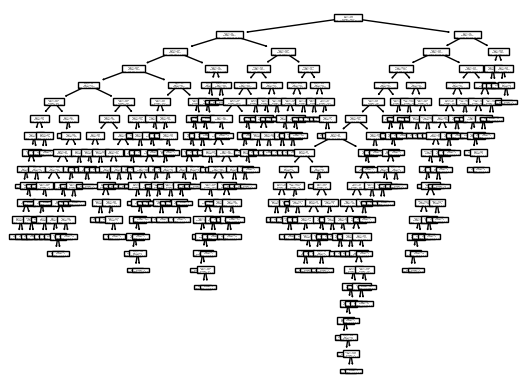

In [57]:
tree.plot_tree(c)

In [47]:
c.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
#accuracy on Training dataset
c.score(X_train,y_train),c.score(X_test,y_test)

(1.0, 0.9984917442845047)

In [49]:
#RANDOM FORESTS:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
rf.score(X_train,y_train),rf.score(X_test,y_test)

(1.0, 0.9995237087214225)

In [53]:
#LOGESTIC REGRESSION:

from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(class_weight='balanced')
sd=logreg.fit(X_train,y_train)
logreg.score(X_train,y_train),logreg.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.5847357677477886, 0.5860234970364098)